# Make Moons Decision Tree Assignment

Task: 
Train and fine-tune a Decision Tree for the moons dataset by following the given steps: -
* Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset.
* Use train_test_split to split the datatset into a training and test set
* Use grid search with cross validation with the help of GridSearchCv to find good hyperparameter values for our DecisionTreeClassifier (try using various values for the max_leaf_nodes hyperparameter)
* Train it on the full training set using these hyperparameters and measure the models accuracy on the test set. Try to get an accuracy goal of 85-87%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Use make_moons to generate a moons dataset

In [2]:
# Import dataset

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X, y

(array([[ 0.9402914 ,  0.12230559],
        [ 0.12454026, -0.42477546],
        [ 0.26198823,  0.50841438],
        ...,
        [-0.24177973,  0.20957199],
        [ 0.90679645,  0.54958215],
        [ 2.08837082, -0.05050728]]),
 array([1, 0, 0, ..., 1, 0, 1]))

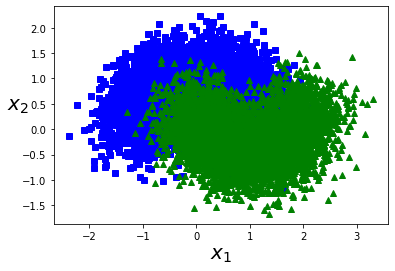

In [5]:
# Visualise make moons dataset

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20, rotation=0)
plt.show()

## 2. Use train_test_split to split the dataset into a training and test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7500, 2), (7500,), (2500, 2), (2500,))

## 3. Modelling

1. Lets create a baseline model without tuning any hyperparameters
2. Use GridSearchCV to find good hyperparameter values for our DecisionTreeClassifier


### 3.1 Basline model

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
from sklearn.tree import plot_tree

In [10]:
y_pred = tree_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, f1_score

print("Validation Accuracy: ", accuracy_score(y_test, y_pred))
print("Validation F1 score: ", f1_score(y_test, y_pred))

y_pred_train = tree_clf.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Training F1 score: ", f1_score(y_train, y_pred_train))

Validation Accuracy:  0.806
Validation F1 score:  0.8040404040404041
Training Accuracy:  1.0
Training F1 score:  1.0


Since our training accuracy is 100% and our test accuracy is 80.6% it is obvious that we are overfitting our model. This is as expected of Decision Trees without regularization. We will try to fix this by using the min an max hyperparameters of the classifier.


### 3.2 Using GridSearchCV to tune DecisionTreeClassifer

In [17]:
from sklearn.model_selection import GridSearchCV

In [21]:
params = {'max_leaf_nodes': list(range(2, 100)), 'max_depth': (2, 50), 'min_samples_split': (2, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': (2, 50),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': (2, 10)})

In [22]:
grid_search.best_params_

{'max_depth': 50, 'max_leaf_nodes': 21, 'min_samples_split': 2}

In [23]:
tree_clf_tuned = DecisionTreeClassifier(random_state=42, max_depth=10, max_leaf_nodes=21, min_samples_split=2)
tree_clf_tuned.fit(X_train, y_train)

y_preds_tuned = tree_clf_tuned.predict(X_test)
print("Validation Accuracy: ", accuracy_score(y_test, y_preds_tuned))
print("Validation F1 score: ", f1_score(y_test, y_preds_tuned))

y_pred_train_tuned = tree_clf_tuned.predict(X_train)
print("Training Accuracy: ", accuracy_score(y_train, y_pred_train_tuned))
print("Training F1 score: ", f1_score(y_train, y_pred_train_tuned))

Validation Accuracy:  0.8648
Validation F1 score:  0.8654458598726115
Training Accuracy:  0.8669333333333333
Training F1 score:  0.8692348008385744


As you can see our model is not longer overfitting and instead is performing better than before. We have achieved the goal of trying to get an accuracy between 85-87%.

Best hyperparameter are: {'max_depth': 50, 'max_leaf_nodes': 21, 'min_samples_split': 2}